In [1]:
import numpy as np
from IPython.display import Image

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Устанавливаем глобальный seed для всех случайностей
np.random.seed(42)

# Введение в генеративное моделирование

### Структура работы генеративной модели
___Генеративная модель___ оценивает __p(x)__ — вероятность получения наблюдения x.

![title](images/generationpipe.png)

### Прогресс в генерации лиц

![title](images/progress2.png)

В нижнем ряду показаны примеры генерации лиц из работы:

Karras, T., Laine, S., & Aila, T. (2019). A style-based generator architecture for generative adversarial networks. In Proceedings of the IEEE/CVF conference on computer vision and pattern recognition (pp. 4401-4410).
* proceedings работы ([ссылка](https://ieeexplore.ieee.org/document/8953766/authors#authors))
* онлайн сервис, с большим количеством примеров ([ссылка](https://generated.photos/faces))

## Основы генеративного моделирования

Набор точек __X__ сгенерирован правилом _Pdata_.

Возьмите на себя роль генеративной модели). Выберете точку _(x1, x2)_ чтобы она принадлежала распределению _Pdata_.



![title](images/pdata.png)

* Точка А нарушает правило 1 базовых принципов генеративного моделирования — ясно видно, что она не принадлежит распределению pdata, поскольку находится посреди моря.

* Точка B настолько близко расположена от точки из исходного набора данных, что мы не впечатлены способностью модели создать такую точку. Если все образцы, сгенерированные моделью, будут расположены так же близко к точкам из исходного набора, то это можно считать нарушением правила 2 базовых принципов генеративного моделирования.

* Точку C можно рассматривать как успех, потому что она вполне могла быть получена из распределения pdata и существенно отличается от всех точек в исходном наборе.

![title](images/gtdata.png)

# Генеративная модель

На примере с картой мира мы побывали в роли генеративной модели.

Еще раз рассмотрим как работает генеративная модель.

![image](images/source_of_data.png)

У нас есть некоторый источник порождающий данные $X^{data}$.

$Х^{data}$ - это случайная величина.
Случайная, т.е. есть Неопределенность. Мы не знаем какое значение будет получено следующим.

Для нас Источник данных это "черная коробочка" или "таинственный сундук".

Как он устроен внутри неизвестно.

Неизвестно статистическое распределение $P_{data}$ (или вероятностная модель) согласно которой генерируются эти данные $X^{data}$.

В целом распределения $P_{data}$ у Источника может и не быть, но в задаче генеративного моделирования мы полагаем, что оно есть.

Мы наблюдали за Источником, и собрали некоторую выборку $X^{data}$ из экспериментальных данных $X^{data}=\left\lbrace X_1^{data}, X_2^{data},X_3^{data}, ...,\right\rbrace$ , размером $n$.

Пока мы рассматриваем одномерную случайную величину $X^{data}$  , она является действительным числом.
Отобразим все значения выборки $Х^{data}$ на Оси $Х$.

![image](images/generative_model.png)

**Генеративная модель:**
* принимает в себя экспериментальную выборку значений $Х^{data}$
* моделирует статистическое распределение наших данных на основе значений $Х^{data}$

Она "подбирает" статистическое распределение $P_{model}(Х)$, которое по ее мнению лучшим образом описывает процесс генерации данных.
Имея распределение $P_{model}(Х)$, мы можем генерировать новые образцы данных $X^{model}$, но уже из этого распределения.

Мы хотим, чтобы:
* Сгенерированные ей образы $X^{model}$ были похожими на образцы $X^{data}$.

Чем больше $P_{model}(Х)$ походит на $P_{data}(X)$, тем больше образцы $X^{model}$ будут походить на образцы $X^{data}$.

* Модель генерировала новые образцы, отличающиеся от тех, что были в обучающей выборке $X$.

А не просто запомнила, нашу выборку и отдавала значения из нее.

# Теория вероятностей

В контексте генеративных моделей мы остановимся на том, что `Теория вероятности`:

* Изучает случайные события
* Моделирует случайные события с помощью статистических распределений (моделей) с некоторыми параметрами

Для генерации чисел мы можем использовать распределения из Теории вероятностей.

Например, такие как на рисунке ниже.

![image](images/continious_and_discrete_distributions.jpg)

Отметим, что случайные величины бывают дискретными и непрерывными (см. рисунок ниже).

Дискретная случ. величина - принимает конечное или счетное множество значений.
- **Пример:** Количество очков, выпавших при броске игральной кости.

Непрерывная случ. величина - принимает любые значения из некоторого непрерывного интервала.
* **Пример:** Нормированная координата по высоте экрана смартфона, куда пользователь тапнет пальцем.

`Пространство элементарных событий` — множество $\Omega$ всех возможных исходов случайного эксперимента. 

Будем обозначать $e_i$ - возможный исход эксперимента.

**Пространства событий:**
* у дискретной величины это конечное/счетное множество возможных исходов
* у непрерывной - непрерывный отрезок

**Подход к определению вероятности тоже разный:**
* для непрерывной случайной величины задана **Функция плотности вероятности (Probability density function,  сокр. `PDF` )**

`PDF` - это функция $f(x)$, которая определяет вероятность того, что непрерывная случайная величина $X$ примет значение в бесконечно малом интервале $\left[x,x+dx\right]$.

* для дискретной случайной величины задана **Функция вероятности (Probability mass function сокр. `PMF` )**

В англоязычном термине подчеркивается ее противоположность `плотности` вероятности в виде `массы` вероятности.

`PMF` - это функция $f(x)$, возвращающая вероятность $P$ того, что дискретная случайная величина $x$ примет определённое значение.

![image](images/random_variables.png)

Принципиальная разница(см. рисунок ниже) в том, что
* при дискретной случ. величине вероятность определяется для опр. исхода (появление 4-очков на игральной кости)
* для непрерывной случ. величины определяется вероятность попасть в интервал возможных значений величины Х( тапнуть в нижнюю часть экрана смартфона, нормированная координата по высоте от 0 до 0.5).

Как мы видим, вероятность появления, конкретного значения $Х=a$ для непрерывной величины (в точке) равна 0, потому, что длинна отрезка $[a,a]$, равна 0.

Здесь приведены примеры и свойства для:
* функции плотности вероятности `PDF`
* функции вероятности `PMF`

![image](images/pdf_and_pmf.png)

## Распределения непрерывной случайной величины

Функция плотности вероятности (`PDF`) - обычно представлена непрерывной функций в виде аналитической формулы с параметрами распределения.

Свойства:
* Значения $PDF(X=x) \ge 0$
* Интеграл по области определения $\int_{A}^{B}PDF(x)\,\mathrm{d}x=1$

Рассмотрим `PDF` и ее свойства на модели нормального распределения $Norm(\mu, \sigma ^{2})$.

### Нормальное распределение $Norm(\mu, \sigma ^{2})$

`Normal distribution` - английский термин в статьях и фреймворках.

Модель нормального распределения $Norm(\mu, \sigma ^{2})$ с параметрами:
* $\mu$ — `математическое ожидание` (`первый момент случайной величины`), а так же `медиана` и единственная `мода`.

Свойства: Центр симметрии распределения, точка максимума `PDF`.

* $\sigma ^{2}$ — `дисперсия` (`второй момент случайной величины`). Корнем из нее будет параметр $\sigma$ - `среднеквадратичное отклонение`.

Свойства: Определяет ширину и высоту кривой `PDF`. Чем больше $\sigma$, тем шире и ниже кривая `PDF`.

> Зафиксировав значения параметров $Norm(\mu, \sigma ^{2})$ распределения $$\theta=\left\lbrace\mu=0,\sigma=1\right\rbrace$$ мы получаем точный статистический закон описывающий вероятностный процесс генерации всех наших данных, -  функцию плотности вероятности `PDF`) для непрерывной случ. величины.

#### Probability Density Function

Функция плотности вероятности (`PDF`) для нормального распределения:

$$f(x)=Norm(\mu, \sigma ^{2} \mid x)={\frac{1}{\sqrt{2\;\pi\sigma^{2}}}}\cdot e^{-\;{\frac{(x-\mu)^{2}}{2\sigma^{2}}}}$$

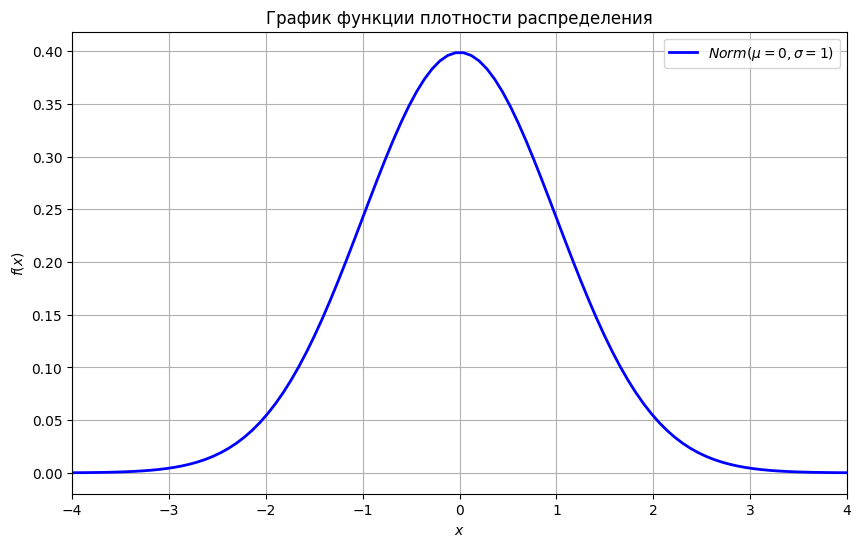

In [2]:
norm_distr_mu = 0  # математическое ожидание
norm_distr_sigma = 1  # среднеквадратичное отклонение

# Демо свойств:
# norm_distr_mu = 2
# norm_distr_sigma = 1

# norm_distr_mu = 0
# norm_distr_sigma = 3

# norm_distr_mu = 0
# norm_distr_sigma = 0.2

# Создание объекта нормального распределения
normal_dist = stats.norm(loc=norm_distr_mu, scale=norm_distr_sigma)

x = np.linspace(-4, 4, 100)
y = normal_dist.pdf(x)

# Построение графика функции плотности распределения
plt.figure(figsize=(10, 6))
plt.plot(
    x, y, "b-", lw=2, label=f"$Norm(\mu={norm_distr_mu}, \sigma={norm_distr_sigma})$"
)

# Добавление дополнительных элементов
plt.title("График функции плотности распределения")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid(True)
plt.legend()

# Задание диапазонов для обеих осей
plt.xlim(-4, 4)

plt.show()

**Ключевой момент:**
* вероятность, что непрерывная случайная величина примет значение $x\in\left\lbrack a,b\right\rbrack$ равна
$$ P(x\in[a,b])=\int_a^bf(x)\,\mathrm{d}x $$

Отобразим вероятность $P(x\in[a, b])$ на графике `pdf` имеющегося нормального распределения $Norm(\mu=0, \sigma=1)$.

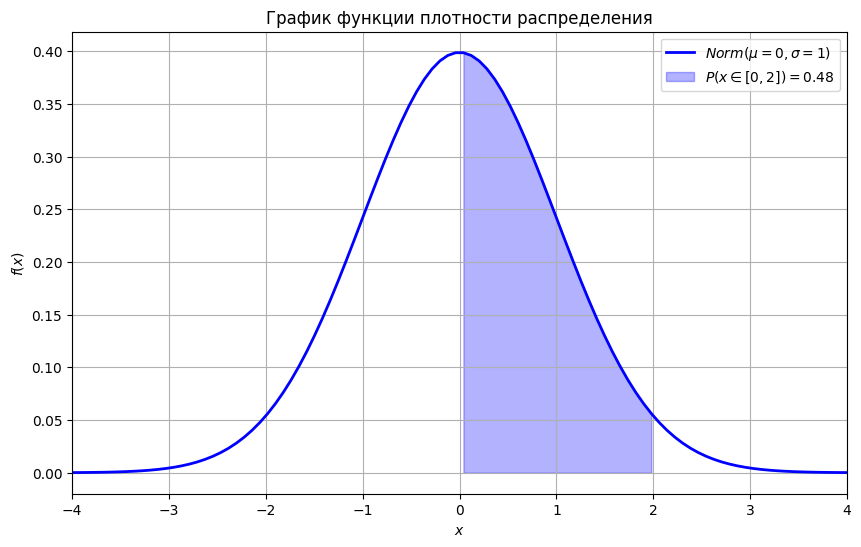

In [3]:
# Построим график нормального распределения
plt.figure(figsize=(10, 6))
plt.plot(
    x, y, "b-", lw=2, label=f"$Norm(\mu={norm_distr_mu}, \sigma={norm_distr_sigma})$"
)

# Определим границы области интегрирования для расчета вероятности
a = 0
b = 2

# Демо свойств:
# a = -1
# b = 1

# a = 1
# b = 1

# a = -4
# b = 4

# Вычисление вероятности попадания в интервал от -1 до 1
probability = normal_dist.cdf(b) - normal_dist.cdf(a)

# Закрашивание области интегрирования соответствующей значению вероятности
plt.fill_between(
    x,
    y,
    where=(x >= a) & (x <= b),
    color="blue",
    alpha=0.3,
    label=f"$P(x\in[{a}, {b}]) = {probability:.2f}$",
)

# Настройка графика
plt.legend()
plt.title("График функции плотности распределения")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid(True)

# Задание диапазонов для обеих осей
plt.xlim(-4, 4)

plt.show()

#### Генерация выборки из распределения

In [4]:
# Генерация 8 случайных чисел с нормальным распределением
normal_numbers = normal_dist.rvs(size=8)

# Вывод результатов
print(normal_numbers)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473]


## Распределения дискретной случайной величины

Функция вероятности (`PMF`) - обычно представлена дискретной функций в виде комбинаторной формулы с параметрами распределения.

Иногда в виде таблицы (Например, Категориальное распределение):

| значение элементарного исхода $e_i$ | вероятность появления |
| ----------------------------------- | --------------------- |
| 0                                   | 0.5                   |
| 1                                   | 0.3                   |
| 2                                   | 0.2                   |


Свойства:
* Значения $0\le PMF\left(X=x\right)\le1$
* Сумма вероятностей всех событий $\underset{i}{\overset{m}{\sum}}PMF(e_i)=1$

Рассмотрим `PMF` и ее свойства на нескольких моделях распределений для дискретной случ. величины.

### Категориальное распределение $Cat(p_d)$

`Categorical distribution` - английский термин в статьях и фреймворках.

Мы разработчики компьютерной RPG игры (см. рисунок ниже).

Есть персонаж игры и он может открыть сундук с сокровищами, используя отмычку.

При открытии сундука персонаж может получить предметы 3х уровней:
* дешевый предмет
* обычный предмет
* ценный предмет

Используя категориальное распределение мы можем определить с какой вероятностью игрок будет получать ту или иную награду. 

![image](images/categorical_distribution.png)

У нас есть схема `эксперимента с d-возможными исходами`.

Мы рассматриваем 1 эксперимент и вероятности происхождения всех элементарных исходов $$\Omega=\left\lbrace e_1, e_2, e_3, ..., e_d \right\rbrace$$

Модель `Категориального распределения` $Cat(p_d)$ имеет параметр:
   * $p_d$ - который представляет собой вектор вероятностей размерности $d$ для наступления каждого из элементарных исходов отдельного эксперимента.

Моделируем вероятности получения награды с его помощью.

`Пространство элементарных событий` в нашем случае:
$$\Omega=\left\lbrace 0, 1, 2 \right\rbrace$$

В нашем случае, у нас 3 возможных исхода: `'0', '1', '2'`, и $d=3$.

$p_{d=3}=[p_0, p_1, p_2]$:

где
* $p_0$ - вероятность наступления события `'0'`
* $p_1$ - вероятность наступления события `'1'`
* $p_2$ - вероятность наступления события `'2'`

Поскольку это все возможные исходы эксперимента:
$$\underset{i}{\overset{d}{\sum}}p_i=1$$

> Зафиксировав параметр $Cat(p_d)$ распределения $$\theta=\left\lbrace p_d=[0.5, 0.3, 0.2] \right\rbrace$$ мы получаем точный статистический закон описывающий вероятностный процесс генерации всех наших данных, - `функцию вероятностей (PMF)` дискретного распределения.

#### Probability Mass Function

`Функция вероятности (PMF)` для Категориального распределения $Cat(p_d)$:

$$f\left(x_i\right)=Cat\left(p_d \mid x=x_i \right)=\left\{
\begin{array}{llllllllll}
	p_1, x=e_1  \\
	p_2, x=e_2 \\
	... \\
	p_d, x=e_d
\end{array}\right.$$

при $x_i \in \Omega=\left\lbrace e_1, e_2, e_3, ..., e_d \right\rbrace$

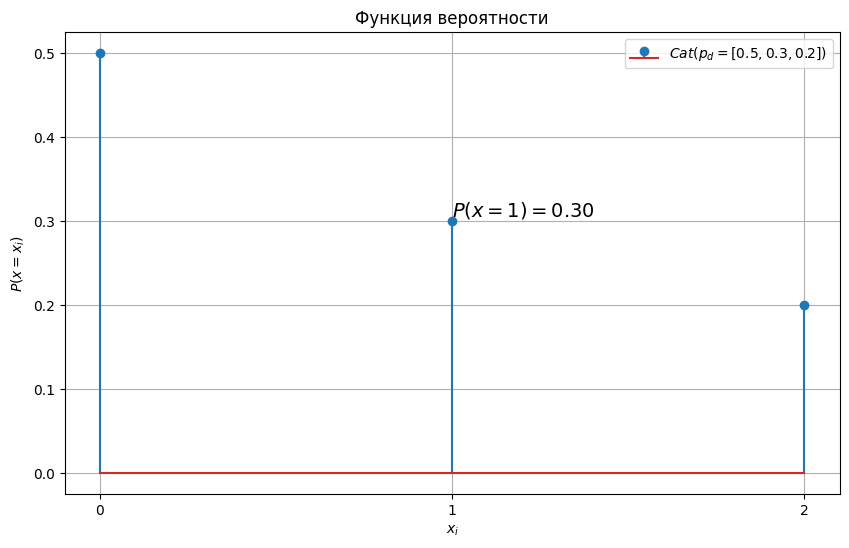

In [5]:
# готового варианта для Categorical Distribution не нашел написал свой вариант =)
from categorical_distribution import CategoricalDistribution

# Параметры распределения
pd = [0.5, 0.3, 0.2]
values = [0, 1, 2]

# частный случай, - дискретное равномерное распределение
# pd = [0.2, 0.2, 0.2, 0.2, 0.2]
# values = [0, 1, 2, 3, 4]

# частный случай, - распределение Бернулли
# pd = [0.8, 0.2]
# values = [0, 1]

# значение k для которого хотим подписать вероятность на графике
x_i = 1

# Вычисляем функцию вероятностей (pmf)
cat_dist = CategoricalDistribution(values=values, pd=pd)
x = np.array(values)
y = cat_dist.pmf(x)

# Построение графика функции вероятности
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(x, y, label=f"$Cat(p_d={pd})$")
ax.set_xticks(x)

# Подпишем вероятности на графике
ax.text(
    x[x_i],
    y[x_i],
    f"$P(x={x[x_i]})={y[x_i]:.2f}$",
    verticalalignment="bottom",
    horizontalalignment="left",
    fontsize=14,
)

# Добавление дополнительных элементов
plt.title(f"Функция вероятности")
plt.xlabel("$x_i$")
plt.ylabel("$P(x=x_i)$")
plt.grid(True)
plt.legend()
plt.show()

**Ключевой момент:**
* Вероятность, что дискретная случайная величина ($x$) примет конкретное значение ($a$) равна значению функции вероятности $f(x)$ для этой точки:
 $$ P(x=a)=f(x=a)$$

#### Генерация выборки из распределения

In [6]:
sample_size = 8  # количество чисел для генерации

# Генерируем последовательность из 8 элементов
sequence = np.random.choice(values, p=pd, size=sample_size)
print(sequence)

[0 2 2 0 0 0 0 1]


### Распределение Бернулли $Bern(p)$

`Bernoulli distribution` - английский термин в статьях и фреймворках.

Мы разработчики компьютерной RPG игры (см. рисунок ниже).

Есть персонаж игры и он может открыть сундук с сокровищами, используя отмычку.

При открытии сундука персонаж может:
* открыть сундук "успех"
* не открыть сундук "неудача"

Используя распределение Бернулли мы можем определить с какой вероятностью сможет открыть сундук в игре. 

![images](images/bernulli_distribution.png)

Схема `эксперимента Бернулли`.

Мы рассматриваем 1 эксперимент и вероятности происхождения исходов $$\Omega=\left\lbrace 0, 1 \right\rbrace$$


* `1` произошло `интересное` для нас событие. 

По терминологии схемы `эксперимента Бернулли` это событие называется `успех`.

Вероятность этого события обозначим $p=P(x=1)$

* `0` `интересного` для нас события не случилось.

По терминологии схемы `эксперимента Бернулли` это событие называется `неудача`.

Вероятность этого события обозначим $q=P(x=0)$ и $q=1-p$. 

Модель `распределения Бернулли` $Bern(p)$ имеет параметр:
   * $p$ - который представляет собой вероятность наступления события-`успеха`.

Моделируем вероятность открытия сундука с его помощью:
* `1` - сундук открыт, `успех`.
* `0` - сундук остался закрытым, `неудача`.

> Зафиксировав значение параметра $Bern(p)$ распределения $$\theta=\left\lbrace p=0.3\right\rbrace$$ мы получаем точный статистический закон описывающий вероятностный процесс генерации всех наших данных, - `функцию вероятностей` дискретного распределения.



#### Probability Mass Function

`Функция вероятности (PMF)` для распределения Бернулли $Bern(p)$:

$$Bern\left(p \mid x=a \right)=\left\lbrace
\begin{array}{llllllllll}
	p   & ,x=1                                  \\
	1-p & ,x=0                                  \\
\end{array}\right\rbrace$$

при $a \in \left\lbrace0,1\right\rbrace$

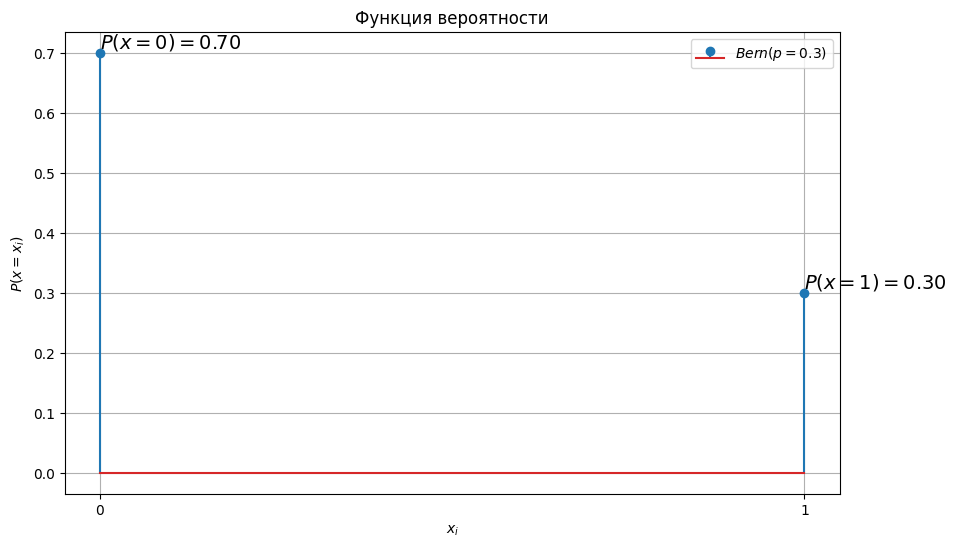

In [7]:
# Параметры распределения
p = 0.3

# Создание объекта распределения Бернулли
bernoulli_dist = stats.bernoulli(p=p)

x = np.arange(0, 1 + 1)
y = bernoulli_dist.pmf(x)

# Построение графика функции вероятности
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(x, y, label=f"$Bern(p={p})$")
ax.set_xticks(x)

# Подпишем вероятности на графике
ax.text(
    0,
    1 - p,
    f"$P(x={0})={1-p:.2f}$",
    verticalalignment="bottom",
    horizontalalignment="left",
    fontsize=14,
)

ax.text(
    1,
    p,
    f"$P(x={1})={p:.2f}$",
    verticalalignment="bottom",
    horizontalalignment="left",
    fontsize=14,
)

# Добавление дополнительных элементов
plt.title(f"Функция вероятности")
plt.xlabel("$x_i$")
plt.ylabel("$P(x=x_i)$")
plt.grid(True)
plt.legend()
plt.show()

#### Генерация выборки из распределения

In [8]:
# результат работы двух функций идентичен
def bernoulli_np(p, n=1):
    return np.random.choice([0, 1], size=n, p=[1 - p, p])


def bernoulli_stats(p, n=1):
    return stats.bernoulli(p).rvs(size=n)


sample_size = 8  # Количество чисел для генерации

bernoulli_numbers = bernoulli_stats(p, sample_size)
print(bernoulli_numbers)

[0 0 0 0 0 0 0 1]


### Биномиальное распределение $Binom(p, n)$

`Binomial distribution` - английский термин в статьях и фреймворках.

![image](images/binomial_distribution.png)

Есть последовательность из экспериментов Бернулли (случайная величина $x^{Bern}$) 

$\left\lbrace x^{Bern}_1, x^{Bern}_2, x^{Bern}_3, ..., x^{Bern}_n\right\rbrace$:

```
[0 1 1 0 0 0 0 0 ... 1] (160 результатов от экспериментов Бернулли)
```


При `Биномиальном распределении` мы проводим серию из $n$ экспериментов Бернулли и нас интересует вероятность появления числа "успехов" $k$ в такой серии экспериментов.

Например, мы взяли $n=20$ сундуков на уровне игры, и хотим узнать вероятность, того, что $k=7$ сундуков из них будут успешно открыты при вероятности открытия каждого отдельно взятого сундука ($p=0.3$).

Такое событие обозначим как $A_{p=0.3, n=20, k=7}$.

Это событие соответствует числу $7$.

И так мы
* берем нашу выборку $x^{Bern}$ из 160 элементов
* делим ее на серии экспериментов по $n=20$
* в рамках каждой серии из 20 экспериментов считаем число успехов $k$ ($x==1$)

Получаем новую дискретную случайную величину

$x^{Binom}=\left\lbrace x^{Binom}_1, x^{Binom}_2, x^{Binom}_3, ..., x^{Binom}_m\right\rbrace$ из 8 чисел:

```
[7 5 6 4 5 5 6 8]
```

Модель Биномиального распределения $Binom(p, n)$ описывается параметрами:
   * $p$ - вероятность успеха в отдельном эксперименте Бернулли.
   * $n$ - количество экспериментов Бернулли в одной серии экспериментов.

Число "успехов" для случайной величины $x^{Binom}$ может варьироваться от $0$ до $n$.

`Пространство элементарных событий` для случайной величины $x^{Binom}$:
$$\Omega=\left\lbrace 0, 1, ..., n \right\rbrace$$

Вероятность события $A_{p=0.3, n=20, k=7}$ обозначим $P(p=0.3, n=20, k=7)$.

> Зафиксировав значение параметров $$\theta=\left\lbrace p=0.3, n=20 \right\rbrace$$ биномиального распределения $Binom(p, n)$ мы получаем точный статистический закон описывающий вероятностный процесс генерации всех наших данных - `функцию вероятностей` дискретного распределения.

#### Probability Mass Function

`Функция вероятности(probability function)` для нашего распределения $Binom(p, n)$:

$$f(x_i)=Binom(p, n \mid x=x_i) = \frac{n!}{k!\left(n-k\right)!}p^k(1-p)^{n-k}$$

при $x_i \in \Omega=\left\lbrace 0, 1, ..., n \right\rbrace$.

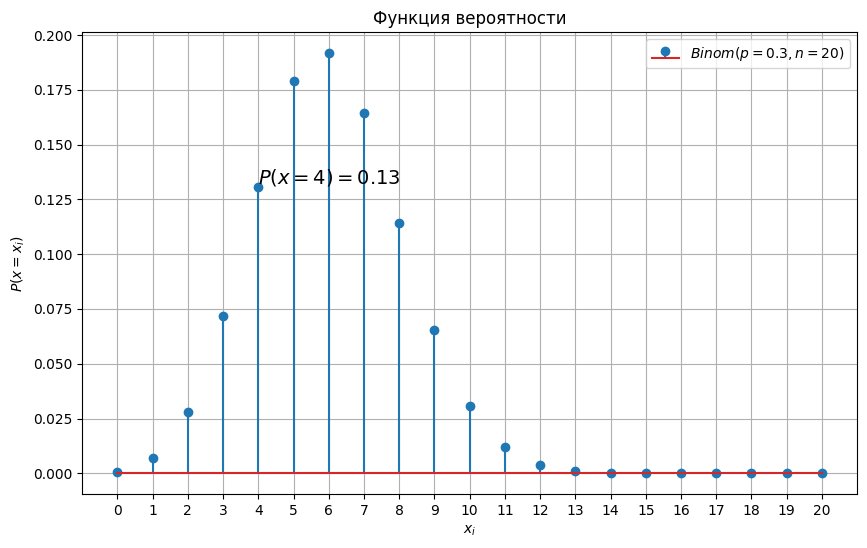

In [9]:
# Параметры Биномиального распределения
p = 0.3
n = 20

# Демо параметров:
# p = 0.7
# n = 20

# p = 0.3
# n = 40

# значение k для которого хотим подписать вероятность
x_i = 4

# Создание объекта Биномиального распределения
binom_dist = stats.binom(p=p, n=n)

x = np.arange(0, n + 1)
y = binom_dist.pmf(x)

# Построение графика функции вероятности
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(x, y, label=f"$Binom(p={p}, n={n})$")
ax.set_xticks(x)

# Подпишем вероятности на графике
ax.text(
    x[x_i],
    y[x_i],
    f"$P(x={x[x_i]})={y[x_i]:.2f}$",
    verticalalignment="bottom",
    horizontalalignment="left",
    fontsize=14,
)

# Добавление дополнительных элементов
plt.title(f"Функция вероятности")
plt.xlabel("$x_i$")
plt.ylabel("$P(x=x_i)$")
plt.grid(True)
plt.legend()
plt.show()

#### Генерация выборки из распределения

In [10]:
sample_size = 8  # Количество чисел для генерации

binomial_numbers = binom_dist.rvs(size=sample_size)
print(binomial_numbers)

[4 6 6 3 6 4 3 9]


## Теория вероятности резюме

Все распределения из Теории вероятностей - простейшие модели генераторов чисел с набором параметров $\theta$.

Обозначение $P(\theta \mid x)$ говорит нам:
* Распределение $P$
* с набором параметров $\theta$ каждый из которых равен опр. значению
* для случайной величины, принявшей значение $x$
* отдает нам:

1. значение `функции вероятности (PMF)` для дискретной случ. величины

или

2. значение `функции плотности вероятности (PDF)` для непрерывной случ. величины

Задавая эти параметры, мы получаем точный статистический закон по которому генерируются объекты.

![image](images/parametric_models.jpg)

В теории вероятностей:

* мы работаем с математическими моделями, которые позволяют моделировать поведение случайных величин.
* мы всегда точно знаем какая модель случайной величины(распределение) генерирует данные.
* все сгенерированные значения подчиняются этому фундаментальному для них закону.

Теория вероятности дала нам множество моделей с параметрами для генерации объектов.

* Как же создать на их основе генеративную модель?

# Математическая статистика

## Постановка задачи Мат. статистики

Где то мы уже слышали раньше, что то похожее... (см. рисунок ниже).

У нас есть некоторый источник порождающий данные $X^{data}$.

$Х^{data}$ - это случайная величина.

Случайная, т.е. есть Неопределенность. Мы не знаем какое значение будет получено следующим.

Для нас Источник данных это "черная коробочка" или "таинственный сундук".

Как он устроен внутри неизвестно.

Мы наблюдали за Источником, и собрали некоторую выборку $X^{data}$ из экспериментальных данных 

$X^{data}=\left\lbrace X_1^{data}, X_2^{data},X_3^{data}, ...,\right\rbrace$ , размером $n$.

![image](images/mathematical_statistics.png)

Мы предполагаем, что все объекты выборки:

* `independent` (`независимы`)

Вероятность появления одного объекта выборки не влияет на вероятность появления другого объекта.

* `identically distributed` (`одинаково распределены`)

Все объекты выборки имеют одинаковое распределение вероятностей $P_{data}(\theta \mid x)$.

Или по другому, что все объекты выборки были сгенерированы одной моделью $P_{data}(\theta \mid x)$

Это фундаментальное предположение `i.i.d. - Independent and Identically Distributed` (`Независимы и одинаково распределены`) в математической статистике.

Это предположение позволяет нам считать, что все объекты выборки были сгенерированы распределением:

* $P_{data}(\theta=\theta' \mid x)$
* с набором параметров $\theta=\theta'$

Мы не знаем:
* саму модель распределения
* значения ее параметров $\theta'$, с которыми оно генерирует выборку

Специалист по Мат. статистике предполагает опр. модель из Теории вероятностей.

$P_{model}\left(\theta \mid х \right)$

Нужно как то "подобрать" все параметры модели по экспериментальной выборке:

$\left\lbrace X_1^{data}, X_2^{data}, X_3^{data}, ..., X_n^{data} \right\rbrace$

В математической статистике существуют `методы оценки параметров`.

Они позволяют подобрать `оптимальные` значения параметров:

$\theta=\hat{\theta}$

для выбранной модели $P_{model}\left(\theta=\hat{\theta} \mid х \right)$ распределения на экспериментальной выборке $X^{data}$.




Важный момент:

- `Теория вероятностей` предоставляет `модели распределений` для описания случайных величин, а `Математическая статистика` использует эти `модели распределений` для анализа экспериментальных данных.

Проводя аналогию с `Машинным обучением`, можно сказать, что `мат. статистка` позволяет "обучать" параметры выбранных моделей из `Теории вероятностей` на экспериментальной выборке.

### Пример зависимых событий (извлечение шаров из урны безвозвратно)

У нас есть урна с 4-мя шарами:
* 2 `синих`
* 2 `красных`

Мы каждый раз достаем из урны 1 шар и не возвращаем его назад.

* Какая это модель статистического распределения и каковы ее параметры $\theta$?

Мы хотим извлечь первый шар из урны(объект выборки 1):

* $P(красный)=\frac{2}{4}=\frac{1}{2}$
* $P(синий)=\frac{2}{4}=\frac{1}{2}$
* $P(красный)=P(синий)$

Допустим мы достали из урны `красный` шар и не вернули его обратно.

Теперь мы хотим извлечь второй шар из урны(объект выборки 2).

Теперь у нас урна с 3-мя шарами:
* 2 синих
* 1 красных

Т.е. после появления `красного` шара в нашей выборке, последующие вероятности появления шаров изменились:

* $P(красный)=\frac{1}{3}$
* $P(синий)=\frac{2}{3}$
* $P(красный) \ne P(синий)$

### Пример независимых событий (извлечение шаров из урны с возвращением)

У нас есть урна с 4-мя шарами:
* 2 `синих`
* 2 `красных`

Мы каждый раз достаем из урны 1 шар и возвращаем его назад.

* Какая это модель статистического распределения и каковы ее параметры $\theta$?

Мы хотим извлечь первый шар из урны(объект выборки 1):

* $P(красный)=\frac{2}{4}=\frac{1}{2}$
* $P(синий)=\frac{2}{4}=\frac{1}{2}$
* $P(красный)=P(синий)$

Допустим мы достали из урны `красный` шар и вернули его обратно.

Теперь мы хотим извлечь второй шар из урны(объект выборки 2).

Исходные данные не изменились, - урна с 4-мя шарами:
* 2 синих
* 2 красных

После появления `красного` шара в нашей выборке, последующие вероятности появления шаров не изменились:

* $P(красный)=\frac{2}{4}=\frac{1}{2}$
* $P(синий)=\frac{2}{4}=\frac{1}{2}$
* $P(красный)=P(синий)$

## Два подхода мат. статистики

**Вопрос:** Так какие методы можно использовать для подбора параметров статистической модели?

**Ответ:** Зависит от того как смотреть на случайность.

Есть два разных подхода к восприятию случайности и они приводят к двум разным разделам статистики:
* Частотная мат. статистика `Frequentist statistics` Рональд Фишер (Ronald Aylmer Fisher)
* Байесовские методы `Bayesian statistics` Томас Байес (Thomas Bayes) и Пьер-Симон Лаплас (Pierre-Simon Laplace)

![image](images/frequentist_and_byesians.png)

### Сравнительная таблица подходов от Дмитрия Ветрова

|                                                                        | Frequentist                                                                                                                               | Bayesian                                                                                                                                                                                                                        |
| ---------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| интерпретация<br>случайности                                           | **Объективная неопределённость**<br>есть случайные процессы<br>их принципиально нельзя<br>предсказать.<br>Примеры:<br>* квантовая физика  | **Субъективное незнание**<br>все определено, но у нас нет <br>всех данных для однозначного<br>прогнозирования.<br>Случайность, как мера нашего незнания.<br>(нет нужных данных)<br>Примеры:<br>* бросок монеты, приход автобуса |
| Величины                                                               | Случайные и детерминированные.<br>Случайная величина:<br>- случ. величина (опр. распределением)<br>Параметры модели:<br>- детерминированы | Все можно интерпретировать<br>как случайную величину.<br>Случайная величина:<br>- случ. величина(опр. распределением)<br>Параметры модели:<br>- случ. величина(опр. распределением)                                             |
| Метод<br>оценки<br>параметров<br>модели <br>(Вывод)<br>(Inference)<br> | Точечные оценки:<br>(оптимальные значения параметров)<br>- Метод максимального правдоподобия(MLE)<br>- Метод моментов<br>                 | - Байесовский вывод:<br>(Апостериорное распределение)                                                                                                                                                                           |
| Применимость                                                           | n >> d<br>n - размер выборки<br>d - размерность параметров                                                                                | ∀n<br>n - размер выборки                                                                                                                                                                                                        |
| Совместимость                                                          | Изначально работает в области<br>n >> d                                                                                                   | при n → ∞<br>переходит в MLE                                                                                                                                                                                                    |

Рекомендую посмотреть лекции(по желанию):
* Лекция от Дмитрия Ветрова ([ссылка](https://youtu.be/Ejsr3S79gcQ?si=xRYtdR4coVRfauk3&t=1020))
* Лекция от Филиппа Ульянкина ([ссылка](https://youtu.be/3ejA7UYy6Jk?si=Wni6LVZhytf13UvJ))

`Математическая статистика` и ее
* `Частотный`  и
* `Байесовский`
подходы очень интересны, но это большие темы, которые даже обзорно затруднительно полностью рассмотреть в рамках одной лекции.

Мы остановимся только на
* Методе Максимального Правдоподобия (Maximum likelihood estimation, сокр. `MLE`)

Более подробно про `Математическую статистику` можно узнать из `великолепных бесплатных курсов`:
* Дмитрий Ветров "Байесовские методы в машинном обучении" ([ссылка YouTube](https://youtube.com/playlist?list=PLEqoHzpnmTfCiJpMPccTWXD9DB4ERQkyw), [описание курса](http://www.machinelearning.ru/wiki/index.php?title=Бммо)).
* Ульянкин Филипп и Демешев Борис "Прикладная статистика" ([ссылка YouTube](https://www.youtube.com/@Прикладнаястатистика/playlists), [ссылка github-репо курса](https://github.com/FUlyankin/matstat-AB))

Это доп. материал для интересующихся, для прохождения нашего курса в обязательном порядке он не требуется.                                                   

# Метод максимального правдоподобия (Частотный подход)

Использование данного метода имеет некоторые отличительные особенности при работе
* с непрерывной случайной величиной
* с дискретной случайной величиной

рассмотрим оба случая. 

## Непрерывная случайная величина

### Математическая статистика Частотный подход

`Математическая статистика` работает с обратной для `теории вероятностей` ситуацией.

* у нас есть экспериментальная выборка данных $\left\lbrace x_1, x_2, x_3, ..., x_n\right\rbrace$:

```
[-0.26947439, 0.74256004, -0.46341769, -0.56572975, 0.24196227, -1.91328024, -1.52491783, 0.56228753]
```
* мы ничего не знаем о модели статистического распределения, которая генерирует экспериментальную выборку значений случайной величины $x$.
* мы предполагаем `i.i.d. - Independent and Identically Distributed` (`Независимы и одинаково распределены`)

т.е. что существует некоторая модель статистического распределения

$P_{data}(\theta=\theta' \mid x)=?$

с зафиксированными значениями параметров $\theta=\theta'$ согласно которому сгенерированы наши данные.

* Нужно выбрать модель для статистического распределения.

Которая из соображений `математической статистики`, подходит под наши данные.

* Мы решили выбрать, модель нормального Распределением $Norm(\mu, \sigma)$.
* Мы ничего не знаем о его параметрах $\theta=\left\lbrace\mu=?,\sigma=?\right\rbrace$
* Мы можем `подобрать` параметры $\theta=\left\lbrace\mu, \sigma\right\rbrace$, которые лучше всего описывают `имеющиеся на данный момент времени данные`.



### Подбор наиболее правдоподобных параметров для распределения

#### Опытно-экспериментальный подход

**Проблема**:

Два специалиста по мат. статистике предлагают 2 набора параметров для норм. распределения, описывающего наши данные:
1. $\theta_1=\left\lbrace\mu_1=0.5,\sigma_1=1.3\right\rbrace$
2. $\theta_2=\left\lbrace\mu_2=-0.1,\sigma_2=0.8\right\rbrace$

Как узнать какой из наборов описывает процесс генерации наших данные лучше?

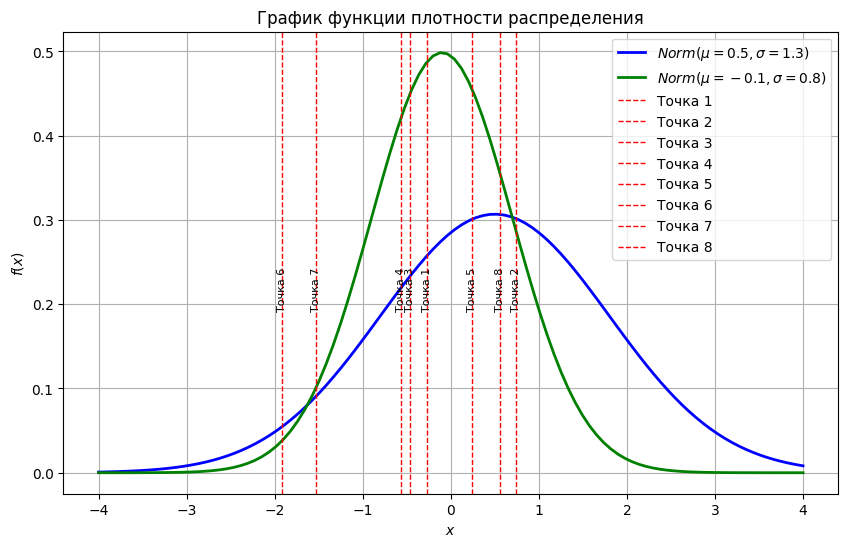

In [11]:
# экспериментальная выборка
x = [
    -0.26947439,
    0.74256004,
    -0.46341769,
    -0.56572975,
    0.24196227,
    -1.91328024,
    -1.52491783,
    0.56228753,
]

# параметры для нормального распределения предложенные
theta_1 = {"mu": 0.5, "sigma": 1.3}  # специалистом 1
theta_2 = {"mu": -0.1, "sigma": 0.8}  # специалистом 2

# создаем нормальные распределения с указанными параметрами
norm_distr_1 = stats.norm(loc=theta_1["mu"], scale=theta_1["sigma"])
norm_distr_2 = stats.norm(loc=theta_2["mu"], scale=theta_2["sigma"])

# Генерация значений для оси X
x_values = np.linspace(-4, 4, 100)
norm_1_y = norm_distr_1.pdf(x_values)
norm_2_y = norm_distr_2.pdf(x_values)

# Построение графика функции плотности распределения
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    x_values,
    norm_1_y,
    "b-",
    lw=2,
    label=f"$Norm(\mu={theta_1['mu']}, \sigma={theta_1['sigma']})$",
)
ax.plot(
    x_values,
    norm_2_y,
    "g-",
    lw=2,
    label=f"$Norm(\mu={theta_2['mu']}, \sigma={theta_2['sigma']})$",
)

# Отметка точек на оси X
for i, xi in enumerate(x):
    ax.axvline(xi, color="red", linestyle="--", linewidth=1, label=f"Точка {i+1}")

    # Добавляем текстовую метку
    ax.text(
        xi,
        max(y),
        f"Tочка {i+1}",
        verticalalignment="bottom",
        horizontalalignment="center",
        rotation=90,
        fontsize=8,
    )

# Отображение графика
plt.legend()
plt.title("График функции плотности распределения")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid(True)
plt.show()

#### Правдоподобие (Likelihood)

> `Функция правдоподобия (Likelihood function)` это функция для оценки вероятности сгенерировать конкретное значение $x_i$ из нашей выборки выбранным распределением с такими то параметрами $\theta'$.

$L(\theta')=f(\theta' \mid x_i)$

* Ее часто называемая просто `Правдоподобие(Likelihood)`.

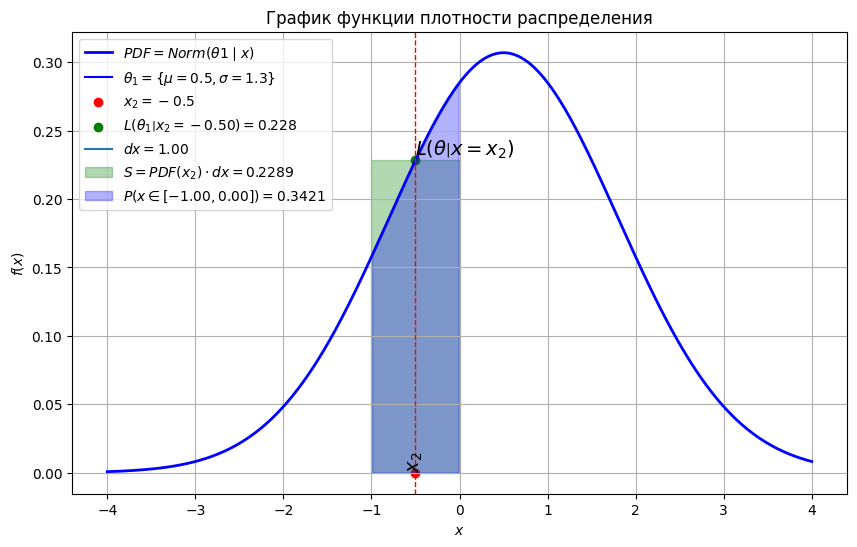

In [27]:
# параметры для нормального распределения предложенные
theta_1 = {"mu": 0.5, "sigma": 1.3}  # специалистом 1

# Визуализируем правдоподобие для точки 2
x2 = -0.5

# Задаем ширину прямоугольника (dx)
dx = (x[1] - x[0]) * 50

# параметры отображения
likelihood_show = True
square_show = True
distr_square_show = True

# создаем нормальное распределение с указанными параметрами
norm_distr_1 = stats.norm(loc=theta_1["mu"], scale=theta_1["sigma"])

# Генерация значений для оси X
x = np.linspace(-4, 4, 400)
y = norm_distr_1.pdf(x)

# Построение графика функции плотности распределения
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, "b-", lw=2, label=r"$PDF=Norm( \theta1 \mid x)$")

# отображаем параметры распределения на легенде
ax.plot(
    [],
    [],
    "b-",
    label=rf"$\theta_1 = \left\lbrace \mu={theta_1['mu']}, \sigma={theta_1['sigma']} \right\rbrace$",
)

ax.scatter(x2, 0, color="red", label=f"$x_2={x2}$")

# Отметка точки на оси X
ax.axvline(x2, color="red", linestyle="--", linewidth=1)
ax.text(
    x2,
    0,
    f"$x_2$",
    verticalalignment="bottom",
    horizontalalignment="center",
    rotation=90,
    fontsize=14,
)

# Добавляем метку Правдоподобия
if likelihood_show:
    y2 = norm_distr_1.pdf(x2)
    ax.scatter(
        x2,
        y2,
        color="green",
        label=rf"$L\left(\theta_1 \left|x_2={x2:.2f}\right.\right)={y2:.3f}$",
    )
    ax.text(
        x2,
        y2,
        r"$L\left(\theta \left| x=x_2 \right.\right)$",
        verticalalignment="bottom",
        horizontalalignment="left",
        fontsize=14,
    )

# Вычисление вероятности попадания в интервал от b до a
if square_show or distr_square_show:
    lower_x, upper_x = x2 - dx / 2, x2 + dx / 2

    # отображаем параметры dx на легенде
    ax.plot([], [], label=rf"$dx={dx:.2f}$")

# Рисуем прямоугольник площадью y2 * dx
if square_show:
    S = (upper_x - lower_x) * (y2 - 0)
    ax.fill_between(
        [lower_x, upper_x],
        0,
        y2,
        color="green",
        label=f"$S = PDF(x_2) \cdot dx={S:.4f}$",
        alpha=0.3,
    )

# Рисуем истинную площадь распределения
if distr_square_show:
    probability = normal_dist.cdf(upper_x) - normal_dist.cdf(lower_x)
    ax.fill_between(
        x,
        y,
        where=(x >= lower_x) & (x <= upper_x),
        color="blue",
        alpha=0.3,
        label=f"$P(x\in[{lower_x:.2f}, {upper_x:.2f}]) = {probability:.4f}$",
    )

# Отображение графика
plt.legend()
plt.title("График функции плотности распределения")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid(True)
plt.show()

Демо:
```
likelihood_show = False
square_show = False
distr_square_show = False
```

* Видим нормальное распределение, с параметрами $Norm(\theta_1 \mid x)$ от специалиста 1.
* Параметры: $\theta_1=\left\lbrace\mu_1=0.5,\sigma_1=1.3\right\rbrace$
* Хотим оценить вероятность появления(генерации) значения $x_2$ в этом распределении.
* Но для непрерывной величины вероятность получить конкретное значение 

$P(\theta_1 \mid x=x_2)= P(\theta_1 \mid x \in [x_2, x_2])=0$

* Как быть?



```
likelihood_show = False
square_show = False
distr_square_show = True
```
* Возьмем некоторую окрестность `dx/2` вокруг нашей точки `x2`
* Можем вычислить вероятность попадания в интервал $P(\theta_1 \mid x \in [x_2 - \frac{dx}{2}, x_2 + \frac{dx}{2}])$

```
likelihood_show = False
square_show = True
distr_square_show = False
```
* Если мы умножим $S = PDF(x_2) \cdot dx$

```
likelihood_show = False
square_show = True
distr_square_show = True
```

* Видим, что $S = PDF(x_2) \cdot dx \sim P(\theta_1 \mid x \in [x_2 - \frac{dx}{2}, x_2 + \frac{dx}{2}])$
* При уменьшении $dx \to 0$

$S = PDF(x_2) \cdot dx - P(\theta_1 \mid x \in [x_2 - \frac{dx}{2}, x_2 + \frac{dx}{2}]) \to 0$

* Можно сказать, что $PDF(x_2) \cdot dx \sim P(\theta_1 \mid x \in [x_2 - \frac{dx}{2}, x_2 + \frac{dx}{2}])$
* $PDF(x_2) = \frac{1}{dx} \cdot P(\theta_1 \mid x \in [x_2 - \frac{dx}{2}, x_2 + \frac{dx}{2}])$
* $dx=const$ - мы берем его одинаковым для всех точек выборки
* $PDF(x_2) \sim P(\theta_1 \mid x \in [x_2 - \frac{dx}{2}, x_2 + \frac{dx}{2}])$

Для непрерывных случайных величин `Правдоподобие` (`Likelihood`) задается как

$L(\theta)=PDF(\theta \mid x)$

```
likelihood_show = True
square_show = False
distr_square_show = False
```

* Смотрим несколько значений для $L(\theta)=PDF(\theta \mid x)$
* Как вы думаете может ли $L(\theta) > 1$ ?

**Особенность:**

* Значение `Правдоподобия(Likelihood)` меняется с изменением имеющегося набора данных в экспериментальной выборке.

Получили новые данные, можно производить переоценку параметров распределения $\theta$.

#### Вероятность(Probability) Vs Правдоподобие(Likelihood)

Отметим важное отличие между `Вероятностью(Probability)` и `Правдоподобием(Likelihood)` для непрерывной случайной величины.

**Теория вероятности и Вероятность:**
* Известен фундаментальный закон генерации данных (тип распределения и его параметры $\theta$). Все данные подчиняются ему. 
* Все значения генерируемые моделью подчиняется этому фундаментальному закону.
* Вероятность $P(x\in[a, b])$ оценивается для интервала значений $[a, b]$.
* Вероятность получить конкретное значение $x=a$, всегда равна $0$.
* Значение вероятности всегда $P \in [0, 1])$
* Вероятность не зависит от экспериментальных данных, ведь данные всегда удовлетворяют фундаментальному закону.

**Мат. статистика и правдоподобие:**
* Не известен фундаментальный закон генерации данных.
* Мы сами выбираем тип распределения, которым попытаемся описать механизм генерации имеющихся на данный момент времени данных из экспериментальной выборки.
* Мы сами выбираем параметры $\theta$ для  выбранного распределения.
* Правдоподобие оценивает вероятность генерации экспериментального значения согласно выбранному распределению и выбранным для него параметрам: 
  $\mathcal{L}(\theta\mid x=a)=f_{\theta}(x=a)$. При этом значение правдоподобия опр. через значение `функции плотности распределения (PDF)`.
* Правдоподобие определено для конкретного значения $x=a$, не равно $0$ в общем случае.
* Значение `правдоподобия`  $\mathcal{L}(\theta\mid x=a)$ как значение `функции плотности распределения (PDF)` в точке $f_{\theta}(x=a)$ при опр. выборе закона распределения и параметров для него может превышать значение 1-цы:
$$\mathcal{L}(\theta\mid x=a)=f_{\theta}(x=a) > 1$$

* Правдоподобие зависит от экспериментальных данных, и меняется при получении новых.



#### Выбираем лучшие параметры из 2х предложенных наборов $\theta$

Два специалиста по мат. статистике предлагают 2 набора параметров для норм. распределения, описывающего наши данные:
1. $\theta_1=\left\lbrace\mu_1=0.5,\sigma_1=1.3\right\rbrace$
2. $\theta_2=\left\lbrace\mu_2=-0.1,\sigma_2=0.8\right\rbrace$

Как узнать какой из наборов описывает процесс генерации наших данные лучше?

> `Правдоподобие для выборки` оценивает вероятность получить экспериментальные данные $\left\lbrace x_1,x_2,x_3,x_4,...,x_n \right\rbrace$ с помощью выбранного нами типа распределения с фиксированными значениями параметров $\theta$ для этого распределения:

$$\mathcal{L}(\theta\mid x_1,x_2,x_3,x_4,...,x_n)=f_{\theta}(x_1,x_2,x_3,x_4,...,x_n)$$

где для непрерывной случайной величины $f_{\theta}(x)$ это `функция плотности вероятности`.

Мы предполагаем, что экспериментальные данные `i.i.d. - Independent and Identically Distributed` (`Независимы и одинаково распределены`).

Учитывая, что каждое значение из наших данных это отдельное наблюдение, которое никак не зависит от предыдущих, можно рассмотреть все как произведение вероятностей независимых событий:

$$\mathcal{L}(\theta\mid x_1,x_2,x_3,x_4,...,x_n) = f_{\theta}(x_1,x_2,x_3,x_4,...,x_n) = f_{\theta}(x_1) \cdot f_{\theta}(x_2) \cdot f_{\theta}(x_1) \cdot ... \cdot f_{\theta}(x_n) = \underset{i=1}{\overset{n}{\prod}}f_{\theta}(x_i) $$

$$\mathcal{L}(\theta\mid x_1,x_2,x_3,x_4,...,x_n) = \underset{i=1}{\overset{n}{\prod}}f_{\theta}(x_i) $$

Чем выше значение `Правдоподобия для выборки` полученное для выбранного типа распределения и набора его параметров $\theta_i$ на наших экспериментальных данных $\left\lbrace x_1,x_2,x_3,x_4,...,x_n \right\rbrace$, тем вероятнее, что данные получены именно такой моделью.

Если 

$$\mathcal{L}(\theta_1\mid x_1,x_2,x_3,x_4,...,x_n) > \mathcal{L}(\theta_2\mid x_1,x_2,x_3,x_4,...,x_n)$$

то говорят, что закон генерации $Norm(\theta_1)$, `более правдоподобен`, чем $Norm(\theta_2)$.

Правдоподобие, что выборка получена из распределения с параметрами от специалиста 1 1.8310037280875249e-06
Правдоподобие, что выборка получена из распределения с параметрами от специалиста 2 1.661729407315026e-05
L1_for_samples < L2_for_samples ?
True


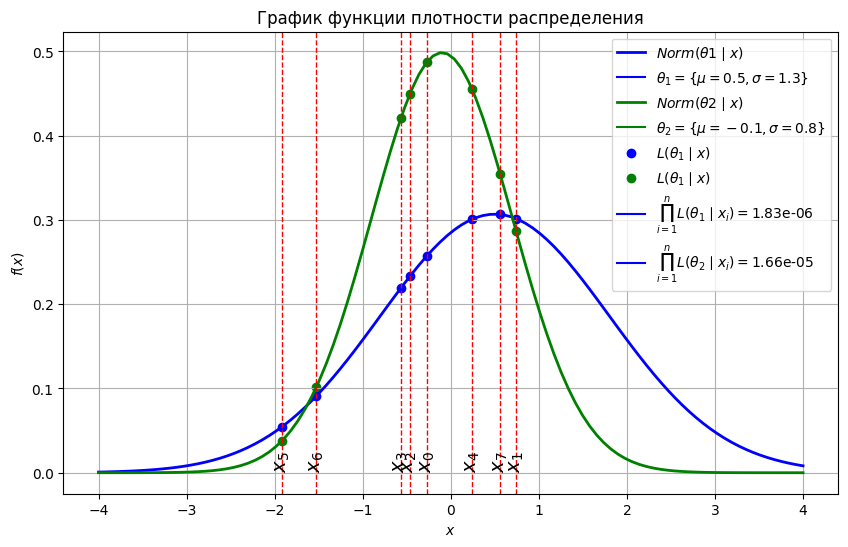

In [13]:
# экспериментальная выборка
x = [
    -0.26947439,
    0.74256004,
    -0.46341769,
    -0.56572975,
    0.24196227,
    -1.91328024,
    -1.52491783,
    0.56228753,
]

# параметры для нормального распределения предложенные
theta_1 = {"mu": 0.5, "sigma": 1.3}  # специалистом 1
theta_2 = {"mu": -0.1, "sigma": 0.8}  # специалистом 2

# создаем нормальные распределения с указанными параметрами
norm_distr_1 = stats.norm(loc=theta_1["mu"], scale=theta_1["sigma"])
norm_distr_2 = stats.norm(loc=theta_2["mu"], scale=theta_2["sigma"])

# Генерация значений для оси X
x_values = np.linspace(-4, 4, 100)
norm_1_y = norm_distr_1.pdf(x_values)
norm_2_y = norm_distr_2.pdf(x_values)

# Построение графика функции плотности распределения
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_values, norm_1_y, "b-", lw=2, label=r"$Norm( \theta1 \mid x)$")
# отображаем параметры распределения на легенде
ax.plot(
    [],
    [],
    "b-",
    label=rf"$\theta_1 = \left\lbrace \mu={theta_1['mu']}, \sigma={theta_1['sigma']} \right\rbrace$",
)
ax.plot(x_values, norm_2_y, "g-", lw=2, label=r"$Norm( \theta2 \mid x)$")
# отображаем параметры распределения на легенде
ax.plot(
    [],
    [],
    "g-",
    label=rf"$\theta_2 = \left\lbrace \mu={theta_2['mu']}, \sigma={theta_2['sigma']} \right\rbrace$",
)

# Отметка точек на оси X
for i, xi in enumerate(x):
    ax.axvline(xi, color="red", linestyle="--", linewidth=1)
    ax.text(
        xi,
        0,
        rf"$x_{i}$",
        verticalalignment="bottom",
        horizontalalignment="center",
        rotation=90,
        fontsize=14,
    )

# Правдоподобия для нормального распределения от специалиста 1
L1 = norm_distr_1.pdf(x)
ax.scatter(x, L1, c="b", label=r"$L(\theta_1 \mid x)$")

# Правдоподобия для нормального распределения от специалиста 2
L2 = norm_distr_2.pdf(x)
ax.scatter(x, L2, c="g", label=r"$L(\theta_1 \mid x)$")

# Считаем Правдоподобия для выборок
L1_for_samples = np.prod(L1)
# отображаем Правдоподобия для выборки на легенде
ax.plot(
    [],
    [],
    "b-",
    label=r"$\underset{i=1}{\overset{n}{\prod}}L(\theta_1 \mid x_i)=$" + f"{L1_for_samples:.2e}",
)
L2_for_samples = np.prod(L2)
# отображаем Правдоподобия для выборки на легенде
ax.plot(
    [],
    [],
    "b-",
    label=r"$\underset{i=1}{\overset{n}{\prod}}L(\theta_2 \mid x_i)=$" + f"{L2_for_samples:.2e}",
)

print(
    f"Правдоподобие, что выборка получена из распределения с параметрами от специалиста 1 {L1_for_samples}"
)
print(
    f"Правдоподобие, что выборка получена из распределения с параметрами от специалиста 2 {L2_for_samples}"
)
print("L1_for_samples < L2_for_samples ?")
print(L1_for_samples < L2_for_samples)

# Отображение графика
plt.legend()
plt.title("График функции плотности распределения")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid(True)
plt.show()

Видим, что $Norm(\theta_2 \mid x)$ от специалиста 2, выглядит `более правдоподобным`, для описания закона по которым генерируются наши экспериментальные данные =)

#### Метод Оценки максимального правдоподобия (Maximum likelihood estimation [сокр. MLE]

**Проблема:**
Поскольку параметры распределения могут принимать бесконечное число различных значений, у нас будет бесконечное множество вариантов различных параметров, и соответствующих им распределений.

`А можно ли как то сразу найти самые лучшие параметры для выбранного типа распределения, которое лучше всего подойдут в качестве модели-генератора наших данных?`

> `Оценка максимального правдоподобия (Maximum likelihood estimation [MLE])` состоит в подборе такого набора параметров $\widehat{\theta}^{MLE}$ для выбранного распределения при котором `Правдоподобие для выборки` на наших данных достигнет максимума.

$$ {\widehat{\theta}}^{M L E}=\underset{\theta}{\mathrm{argmax}}\,\mathrm{L}(\theta\mid x_{1},\ldots,x_{n})=\underset{\theta}{\mathrm{argmax}}\,\underset{i=1}{\overset{n}{\prod}}f_{\theta}(x_i)$$

Метод `Метод максимального правдоподобия` позволяет работать с различными распределениями как `для непрерывных` так, и `для дискретных` случайных величин.

Нам нужно максимизировать выражение правдоподобия для выборки.

Для этого нам нужно найти его экстремум, доказав, что это максимум.

Полный список шагов:
1. Найти производные функции по всем параметрам модели.
2. Приравнять их к нулю и решить уравнения по параметрам ${\widehat{\theta}}^{M L E}$.

Так мы найдем параметры соответствующие особым точкам, но надо бы еще убедится, что это максимум.

3. Берем вторые производные и если они меньше нуля при подстановке наших параметров {\widehat{\theta}}^{M L E}, то мы нашли максимум.

На практике доказывается, что наша функция будет унимодальна - есть только 1 максимум.

И выполняют только шаги 1 и 2.

Попробуем найти производную по всем параметрам модели:

$$ {\widehat{\theta}}^{M L E}=\underset{\theta}{\mathrm{argmax}}\,\mathrm{L}(\theta\mid x_{1},\ldots,x_{n})=\underset{\theta}{\mathrm{argmax}}\,\underset{i=1}{\overset{n}{\prod}}f_{\theta}(x_i)$$

Производная произведения:

* для двух функций: $\left(f g\right)^{\prime}=f^{\prime}g+f g^{\prime}$
* для 3 функций: $(u\cdot v\cdot w)^{\prime}=u^{\prime}\cdot v\cdot w+u\cdot v^{\prime}\cdot w+u\cdot
v\cdot w^{\prime}$

Метод MLE применяется при $n >> d$:
* $d$ - количество параметров которые мы хотим оценить.
* $n$ - размер выборки (датасета)

Для оценки 10 параметров, нужен размер выборки на 1000 объектов минимум.

Произведение 1000 функций, и от этого производную =)

А в датасетах бывает и 10^6 образцов и как нам считать такие производные?

##### Логарифм правдоподобия и его преимущества

`Логарифм правдоподобия` это $Log(L(\theta) \mid x)$

1. **Инвариантность к монотонным преобразованиям:**

Логарифм — монотонная функция, поэтому максимум логарифма правдоподобия соответствует максимуму самой функции правдоподобия. 

Это означает, что оптимизация логарифма правдоподобия даст те же оценки параметров, что и оптимизация исходной функции правдоподобия.

2. **Логарифм меняет произведение на сумму**

Брать набор производных от суммы функций гораздо проще чем от произведения функций:

Производная суммы:

* для 2 функций: $(f+g)^{\prime}=f^{\prime}+g^{\prime}$
* для 3 функций: $(f+g+w)^{\prime}=f^{\prime}+g^{\prime}+w^{\prime}$
* для n функций: $\left({\sum}_{i=1}^nf_i(x)\right)^{\prime}={\sum}_{i=1}^nf_i(x)^{\prime}$


При использовании `логарифма правдоподобия`, выражение задачи для $\widehat{\theta}^{MLE}$ преобразуется в вид:

$$\log L\left(\theta\right)=\log\left(\prod_{i=1}^nf(\theta \mid x_i)\right)=\sum_{i=1}^n\log(f(\theta \mid x_i))$$

Задача оптимизации по максимизации логарифма правдоподобия через параметр $\theta$ сведется к поиску экстремума:

$${\frac{\partial log_{}{L}}{\partial\,\theta}}=\sum_{i=1}^n{\frac{\partial log_{}f(x_{i}\mid\theta)}{\partial\,\theta}}=0$$

Решив это уравнение получим оптимальный набор параметров распределения ${\widehat{\theta}}^{MLE}$ для выбранного нами распределения.

Это распределение будет наиболее правдоподобным в качестве генератора имеющейся у нас выборки $\left\lbrace x_1,x_2,x_3,x_4,...,x_n \right\rbrace$.

Решение этого уравнения будет различным для различных распределений описывающих нашу случаиную величину.

3. Обеспечивает точность вычислений

Предположим, что нам удается дать ЭВМ задачу на вычисление дифференцирования произведения функций.

Сможем ли мы ее посчитать?

In [14]:
# посмотрим точность для типа float в python
import sys

sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Наименьшее значение - sys.float_info.min (2.2250788585072014e-308)

Наибольшее значение - sys.float_info.max (1.7976931348623157e+308)

Подробности в документации [ссылка](https://translated.turbopages.org/proxy_u/en-ru.ru.0aad166c-66e14549-6e642a45-74722d776562/docs.python.org/library/sys.html#sys.float_info).

При достаточно большом количестве перемножений плотностей вероятности мы можем выйти за данный предел точности.

Предположительно это может случится при расчете вероятности появления картинки персонажа с опр. стилем. Там около 500 пикселей, на каждый из RGB-каналов изображения, итого 1500.

In [15]:
print(10**(-308)) # все еще маленькое значение
print(10**(-350)) # наше маленькое значение превратилось в 0

# ситуация, которой мы опасаемся перемножение большого числа маленьких
# плотностей вероятностей превращается в ноль из за ограничений точности
p = 10**(-308)
print(p * p * p) 

1e-308
0.0
0.0


Использование логарифмов существенно повышает точность вычислений:

In [16]:
# маленькая вероятность превратилась в небольшое число
print(np.log10(p))

# использование логарифма
p = np.log10(p)
print(p * p * p) 

-308.0
-29218112.0


Точность вычислений повысилась до $10^{-29218112}$ при ограничении на $10^{-308}$ для float в Python.

Можно использовать логарифм любого основания, но мне нравится, что $log_{10}$ интуитивно позволяет сразу представить себе порядок величины.

$$log_{10}(x)=2, x=100$$
$$log_{10}(x)=3, x=1000$$
$$log_{10}(x)=2.5, x \in [100,1000]$$

основание 10 удобно =)

#### MLE для нормального распределения

Применяем метод `MLE` к нормальному распределению.

1. Берем формулу для нормального распределения:
$$f(x)={\frac{1}{\sqrt{2\;\pi\sigma^{2}}}}\cdot e^{-\;{\frac{(x-\mu)^{2}}{2\sigma^{2}}}}$$

2. Функция правдоподобия для выборки:

Для нашей выборки $X=\{x_{1},x_{2},\ldots,x_{n}\}$ функция правдоподобия для выборки $L(\mu,\sigma^{2} \mid X)$ запишется как 
$$L(\mu,\sigma^{2} \mid X)=\prod_{i=1}^{n}f(\mu,\sigma^{2} \mid x_{i})$$

Подставляя формулу плотности, получаем:

$$L(\mu,\sigma^{2} \mid X)=\prod_{i=1}^{n}{\frac{1}{\sqrt{2\pi\sigma^{2}}}}\exp\left(-{\frac{(x_{i}-\mu)^{2}}{2\sigma^{2}}}\right)$$

3. Логарифмическая функция правдоподобия:

Чтобы иметь возможность это посчитать используем `Логарифм правдоподобия`:

* чтобы избавится от экспоненты, удобно взять `натуральный логарифм` $ln()$.

$$\ln L(\mu,\sigma^{2} \mid X)=\textstyle\sum_{i=1}^{n}\ln f(\mu,\sigma^{2} \mid x_{i})$$

Подставляя формулу плотности, получаем:

$$\ln L(\mu,\sigma^{2} \mid X)=-\frac{n}{2}\ln(2\pi\sigma^{2})-\sum_{i=1}^{n}\frac{(x_{i}-\mu)^{2}}{2\sigma^{2}}$$

4. Максимизация логарифма правдоподобия:

Чтобы найти оценки $\hat{\mu}$ и $\hat{\sigma}^2$, которые максимизируют `логарифм правдоподобия`, нужно взять частные производные по $\mu$ и $\sigma^2$ и приравнять их к нулю.

- Берем производную по $\mu$ и приравниваем ее к 0:

Исходное выражение:

$$\ln L(\mu,\sigma^{2} \mid X)=-\frac{n}{2}\ln(2\pi\sigma^{2})-\sum_{i=1}^{n}\frac{(x_{i}-\mu)^{2}}{2\sigma^{2}}$$

Взяли производную и приравняли ее к нулю:

$$\frac{\partial \ln L}{\partial \mu} = \sum_{i=1}^{n} \frac{(x_i - \mu)}{\sigma^2} = 0$$

* Решением этого уравнения будет уже оптимальное значение для параметра $\mu$ полученное методом `MLE`.
* Обозначим это значение как $\hat\mu^{MLE}$

Запишем без лишнего:

$$\sum_{i=1}^{n} \frac{(x_i - \hat\mu^{MLE})}{\sigma^2} = 0$$

Умножим на $\sigma^2$:

$$\sum_{i=1}^n(x_i-\hat\mu^{MLE})=0$$

$\hat\mu^{MLE}=const$ можно вынести за знак суммы умножив на $n$: 

$$\sum_{i=1}^{n} x_i - n\hat\mu^{MLE} = 0$$

Перенесли $n\hat\mu^{MLE}$ в право, и поделили на $n$:

$$\hat{\mu}^{MLE} = \frac{1}{n} \sum_{i=1}^{n} x_i = \bar{x}$$

Таким образом, оценка $\hat{\mu}^{MLE}$ — это выборочное среднее $\bar{x}$.

- Берем производную по $\sigma$ и приравниваем ее к 0:

Исходное выражение:

$$\ln L(\mu,\sigma^{2} \mid X)=-\frac{n}{2}\ln(2\pi\sigma^{2})-\sum_{i=1}^{n}\frac{(x_{i}-\mu)^{2}}{2\sigma^{2}}$$

Взяли производную:

$$\frac{\partial\ln L}{\partial\sigma^{2}}=-\frac{n}{2\sigma^{2}}+\sum_{i=1}^{n}\frac{(x_{i}-\mu)^{i}}{2(\sigma^{2})^{2}}=0$$

* Решением этого уравнения будет уже оптимальное значение для параметра $\mu$ полученное методом `MLE`.
* Обозначим это значение как $\hat\sigma^2$

Запишем без лишнего:

$$-\frac{n}{2\hat\sigma^2} + \frac{1}{2(\hat\sigma^2)^2} \sum_{i=1}^{n} (x_i - \mu)^2 = 0$$

Умножим обе части уравнения на $2(\hat\sigma^2)^2$, чтобы избавиться от дробей:

$$-\frac{n}{2\hat\sigma^2} \cdot {2(\hat\sigma^2)^{2}} + \frac{1}{\cancel{2(\hat\sigma^2)^2}} \cdot {\cancel{2(\hat\sigma^2)^2}} \sum_{i=1}^{n} (x_i - \mu)^2 = 0 \cdot 2(\hat\sigma^2)^2$$

Упрощаем:
$$-\frac{n(\hat\sigma^2)^2}{\hat\sigma^2} + \sum_{i=1}^{n} (x_i - \mu)^2 = 0$$

Сократим $\hat\sigma^2$ в первом члене:
$$-n\hat\sigma^2 + \sum_{i=1}^{n} (x_i - \mu)^2 = 0$$

Перенесем $-n\hat\sigma^2$ в правую часть уравнения:
$$\sum_{i=1}^{n} (x_i - \mu)^2 = n\hat\sigma^2$$

Разделим обе части уравнения на $n$:
$$\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2 = \hat\sigma^2$$

$$\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2$$

Извлекаем корень:

$$\hat\sigma^{MLE}=\sqrt{\frac{1}{n}\underset{i=1}{\overset{n}{\sum}}\left(x_i-\overline{x}\right)^2}$$

Корень из выборочной дисперсии называется выборочным стандартным отклонением (sample standard deviation). 

P.S. Подробный вывод показан в видео([ссылка](https://youtu.be/mH8022OsfuI?si=0nRaiaLBtK2FTshu)) у Филлипа Ульянкина.

Итоговые оптимальные параметры по методу MLE для нормального распределения:

* оптимальный $\mu$ это выборочное среднее:

$$\hat\mu^{MLE}=\overline{x}={\frac{1}{n}} \underset{i=1}{\overset{n}{\sum}}x_{i}$$

* оптимальный $\sigma$ это выборочным стандартное отклонением:

$$\hat\sigma^{MLE}=\sqrt{\frac{1}{n}\underset{i=1}{\overset{n}{\sum}}\left(x_i-\overline{x}\right)^2}$$

# Работа с несколькими событиями происходящими одновременно

## Условная вероятность

Условная вероятность — это вероятность наступления одного события при условии, что другое событие уже произошло. Обозначается как $P(A|B)$, что читается как "вероятность события $A$ при условии, что событие $B$ уже произошло".

Условная вероятность события $A$ при условии события $B$ определяется по формуле:
$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

![image](images/conditional_probability.png)

* $A$ — событие выпадения четного числа

$\Omega=\{2, 4, 6\}$

$P(A) = \frac{3}{6} = \frac{1}{2}$

* $B$ — событие выпадения числа больше 3

$\Omega= \{4, 5, 6\}$

$P(B) = \frac{3}{6} = \frac{1}{2}$

Найдем совместную вероятность событий A и B.
$P(A \cap B)$ — вероятность того, что выпадет четное число и оно будет больше 3

$\Omega= \{4, 6\}$

$P(A \cap B)=\frac{2}{6}=\frac{1}{3}$

Условная вероятность
$P(A|B)$:$$ P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{1}{3}}{\frac{1}{2}} = \frac{2}{3} $$

## Совместная вероятность (Joint Probability)

Совместная вероятность — это вероятность того, что два или более события произойдут одновременно. 
Другими словами, это вероятность того, что все указанные события произойдут вместе.

### Обозначение и формула

Если у нас есть два события (A) и (B), их совместная вероятность обозначается как $P(A \cap B)$. 
Формула для вычисления совместной вероятности:
 
 Выделяем $P(A \cap B)$ из определения условной вероятности:   
 $$P(A \cap B) = P(A|B) \cdot P(B) $$
   Аналогично, можно записать:
   $$ P(A \cap B) = P(B|A) \cdot P(A)$$
Таким образом, мы получили **правило цепи для двух событий**:
$$ P(A \cap B) = P(A|B) \cdot P(B) = P(B|A) \cdot P(A) $$
- $P(A)$   — вероятность события $A$,
- $P(B|A)$ — условная вероятность события $B$ при условии, что событие $A$ уже произошло,
- $P(B)$   — вероятность события $B$,
- $P(A|B)$ — условная вероятность события \(A\) при условии, что событие $B$ уже произошло.

### Важные свойства

1. Нормировка:
- Совместная вероятность всегда находится в диапазоне от 0 до 1.
2. Независимость:
- Если события (A) и (B) независимы, то 

### "Расщепление вероятностей"

* Событие А - "открыть сундук отмычкой" из примера для распределения Бернулли.
* Событие B - "в сундуке предмет опр. ценности" из примера для Категориального распределения.

Хотим рассмотреть совместное дискретное распределение вероятностей.
Вероятности всех возможных совместных событий (попарно):

$P(A \cap B) = P(A|B) \cdot P(B)$

Наши события независимы, поэтому:
$P(A \cap B) = P(A) \cdot P(B)$

| A\B               | 0 - дешевый предмет | 1 - обычный предмет | 2 - ценный предмет |     |
| ----------------- | ------------------- | ------------------- | ------------------ | --- |
| 0 - сундук закрыт | 0.5 * 0.7 = 0.35    | 0.3 * 0.7 = 0.21    | 0.2 * 0.7 = 0.14   | 0.7 |
| 1 - сундук открыт | 0.5 * 0.3 = 0.15    | 0.3 * 0.3 = 0.09    | 0.2 * 0.3 = 0.06   | 0.3 |
|                   | 0.5                 | 0.3                 | 0.2                |     |

${\sum}_{i=0}^n{\sum}_{k=0}^mP\left(A_i\right)P\left(B_i\right)=1$

Для нашего примера:
0.35 + 0.21 + 0.14 + 0.15 + 0.09 + 0.06 = 1


### Правило цепи (Chain Rule) в теории вероятностей

Правило цепи (Chain Rule) в теории вероятностей ([ссылка](https://en.wikipedia.org/wiki/Chain_rule_(probability))) позволяет выразить совместную вероятность нескольких событий через условные вероятности. Это правило является одним из фундаментальных инструментов в теории вероятностей и статистике.

Для 2 событий мы его уже знаем:
* Зависимые события: $P(A \cap B) = P(A|B) \cdot P(B)$
* Независимые события: $P(A \cap B) = P(A|B) \cdot P(B)$

Для 3 событий событий $A_1, A_2, A_3$:
* Зависимые события:  $P(A_1 \cap A_2 \cap A_3) = P(A_1) \cdot P(A_2|A_1) \cdot P(A_3|A_1 \cap A_2)$
* Независимые события: $P(A_1 \cap A_2 \cap A_3) = P(A_1) \cdot P(A_2) \cdot P(A_3)$

Для 4 событий $A_1, A_2, A_3, A_4$:
* Зависимые события:  $(A_1 \cap A_2 \cap A_3 \cap A_4) = P(A_1) \cdot P(A_2|A_1) \cdot P(A_3|A_1 \cap A_2) \cdot P(A_4|A_1 \cap A_2 \cap A_3)$
* Независимые события: $(A_1 \cap A_2 \cap A_3 \cap A_4) = P(A_1) \cdot P(A_2) \cdot P(A_3) \cdot P(A_4)$

![image](images/chain_rule_for_probability.png)

# Генератор стиля


Даны примеры популярных стилей жителей города N. Необходимо сделать генератор новых стилей для них.

![title](images/style.png)

Сделаем список различных элементов стиля:


In [17]:
styles = {
    "прическа": [
        "нет волос",
        "длинные в пучок",
        "длинные волнистые",
        "длинные прямые",
        "короткая волнистые",
        "короткая прямые",
        "короткая курчавые",
    ],
    "цвет волос": [
        "черный",
        "блонд",
        "каштановый",
        "пастельный розовый",
        "рыжий",
        "серебристо серый",
    ],
    "аксесуар": [
        "нет очков",
        "круглые очки",
        "солнцезащитные очки",
    ],
    "одежда": [
        "худи",
        "комбинезон",
        "футболка с круглым вырезом",
        "футболка с V-вырезом",
    ],
    "цвет одежды": [
        "черный",
        "синий",
        "серый",
        "зеленый",
        "оранжевый",
        "розовый",
        "красный",
        "белый",
    ],
}

In [18]:
param_counts = 1
for s in styles.values():
    param_counts *= len(s)
param_counts

4032

In [19]:
styles_count = {
    "прическа": [7, 0, 1, 23, 1, 11, 7],
    "цвет волос": [
        7,
        6,
        2,
        3,
        8,
        24,
    ],
    "аксесуар": [
        11,
        22,
        17,
    ],
    "одежда": [
        7,
        18,
        19,
        6,
    ],
    "цвет одежды": [4, 5, 6, 8, 6, 8, 7, 6],
}

In [20]:
for k in styles_count.keys():
    summ = 0
    for s in styles_count[k]:
        summ += s
    print(k, summ)

прическа 50
цвет волос 50
аксесуар 50
одежда 50
цвет одежды 50


Реализуйте следующие модели:

### Полиномиальная модель

![title](images/polynom.png)

### Аддитивное сглаживание (MLE)

![title](images/MLE.png)

Подробные формулы для наивной байесовской модели с MLE:
![title](images/formla1.png)
![title](images/formula2.png)

### Полиномиальная модель с MLE для пикселей

![title](images/pixels.png)

![title](images/style2.png)

![title](images/pixgen.png)

Как думаете почему наивная байесовская модель плохо справилась с задачей?

#### Сложности генеративного моделирования

* Как модель может справиться с высокой условной взаимозависимостью признаков?

* Как модель может отыскать одну из крошечных пропорций, чтобы получить удовлетворительное наблюдение в многомерном выборочном пространстве?

## Скрытое представление

Набор образцов тортов:
    
![title](images/tort1.png)

А вот так выглядит скрытое представление всех возможных тортов:
![title](images/tort2.png)    

Опишите функцию __f__, если мин высота торта 5 у.е., мин радиус 3 у.е., макс высота торта 25 у.е., макс радиус 35 у.е.

И последний пример скрытого представления:
![title](images/latent.png)    